In [4]:
import requests
import json

url="https://cn.dataone.org/cn/v2/query/logsolr/"

params = {
    "q":("event:read"
         " AND formatType:(METADATA OR DATA)"
         " AND inPartialRobotList:false"
         " AND isRepeatVisit:false"),
    "facet":"true",
    "facet.limit":-1,
    "facet.mincount":1,
    "facet.field":"formatType",
    "facet.range":"dateLogged",
    "facet.range.start":"2012-07-01T00:00:00.0Z",
    "facet.range.end":"2018-12-05T05:00:00.0Z",
    "facet.range.gap":"+1MONTH",
    "wt":"json",
    "rows":0,
    "indent":"true",
}

response = requests.get(url, params=params)
response_text = response.text
print(response_text)


{
  "responseHeader":{
    "status":0,
    "QTime":11498,
    "params":{
      "facet.range":"dateLogged",
      "q":"event:read AND formatType:(METADATA OR DATA) AND inPartialRobotList:false AND isRepeatVisit:false",
      "facet.limit":"-1",
      "facet.field":"formatType",
      "facet.range.gap":"+1MONTH",
      "indent":"true",
      "facet.mincount":"1",
      "rows":"0",
      "facet":"true",
      "wt":"json",
      "facet.range.start":"2012-07-01T00:00:00.0Z",
      "facet.range.end":"2018-12-05T05:00:00.0Z"}},
  "response":{"numFound":30511562,"start":0,"docs":[]
  },
  "facet_counts":{
    "facet_queries":{},
    "facet_fields":{
      "formatType":[
        "DATA",12898800,
        "METADATA",17612762]},
    "facet_dates":{},
    "facet_ranges":{
      "dateLogged":{
        "counts":[
          "2012-07-01T00:00:00Z",62601,
          "2012-08-01T00:00:00Z",86973,
          "2012-09-01T00:00:00Z",102794,
          "2012-10-01T00:00:00Z",91057,
          "2012-11-01T00:00:0

In [22]:
from datetime import datetime
response_data = json.loads(response_text)
summary = {"metadata":0, "data":0}
timeseries = []
for i in range(0, 4, 2):
    k = response_data["facet_counts"]["facet_fields"]["formatType"][i].lower()
    v = response_data["facet_counts"]["facet_fields"]["formatType"][i+1]
    summary[k] = v

print(f"Total metadata: {summary['metadata']:11,}")
print(f"    Total data: {summary['data']:11,}")
print(f"         Total: {summary['data']+summary['metadata']:11,}")      

Total metadata:  17,612,762
    Total data:  12,898,800
         Total:  30,511,562


In [23]:
entries = response_data["facet_counts"]["facet_ranges"]["dateLogged"]["counts"]
for i in range(0, len(entries), 2):
    entry = [datetime.strptime(entries[i], "%Y-%m-%dT%H:%M:%SZ"), entries[i+1]]
    timeseries.append(entry)


Total: 27,504,196


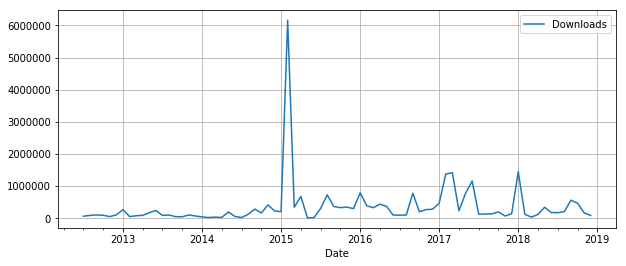

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
data_frame = pd.DataFrame(timeseries, columns=("Date","Downloads",))
data_frame.set_index('Date', inplace=True)

plot = data_frame.plot(figsize=(10,4))
plot.grid(True)
print(f"Total: {data_frame['Downloads'].sum():,}")

In [25]:

params = {
    "q":"event:read AND dateLogged:[\"2012-07-01T00:00:00.000Z\" TO NOW] AND isPublic:0",
    "counterCompliant":"true",
    "facet":"true",
    "facet.field":"formatType",
    "wt":"json",
    "indent":"true",
}
response = requests.get(url, params=params)
response_text = response.text
print(response_text)
data = json.loads(response_text)
result = {"metadata":0, "data":0, "resource": 0}
for i in range(0,6,2):
    result[data["facet_counts"]["facet_fields"]["formatType"][i].lower()] = data["facet_counts"]["facet_fields"]["formatType"][i+1]


{
  "responseHeader":{
    "status":0,
    "QTime":6763,
    "params":{
      "q":"event:read AND dateLogged:[\"2012-07-01T00:00:00.000Z\" TO NOW] AND isPublic:0",
      "facet.field":"formatType",
      "indent":"true",
      "counterCompliant":"true",
      "facet":"true",
      "wt":"json"}},
  "response":{"numFound":48642791,"start":0,"docs":[]
  },
  "facet_counts":{
    "facet_queries":{},
    "facet_fields":{
      "formatType":[
        "METADATA",24317569,
        "DATA",19162309,
        "RESOURCE",1653288]},
    "facet_dates":{},
    "facet_ranges":{},
    "facet_intervals":{},
    "facet_heatmaps":{}}}



In [22]:
for k in result:
    print(f"{k:10}:{result[k]:11,}")

metadata  : 24,317,569
data      : 19,162,309
resource  :  1,653,288
